In [1]:
import pandas as pd 
data1=pd.read_csv('Teleco_Cust_Attr.csv')

In [2]:
data1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data1.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [4]:
data1.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X=data1.drop(['customerID','Churn'],axis=1)

In [8]:
X #removes the custid and churn values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [9]:
y=data1.Churn

In [10]:
y #churn values

0        No
1        No
2       Yes
3        No
4       Yes
5       Yes
6        No
7        No
8       Yes
9        No
10       No
11       No
12       No
13      Yes
14       No
15       No
16       No
17       No
18      Yes
19       No
20      Yes
21       No
22      Yes
23       No
24       No
25       No
26      Yes
27      Yes
28       No
29      Yes
       ... 
7013     No
7014     No
7015     No
7016     No
7017     No
7018    Yes
7019     No
7020     No
7021    Yes
7022     No
7023     No
7024     No
7025     No
7026    Yes
7027     No
7028     No
7029     No
7030     No
7031     No
7032    Yes
7033     No
7034    Yes
7035     No
7036     No
7037     No
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [11]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [12]:
X.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [13]:
X.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
X.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [15]:

X= X.replace({'Yes': 1, 'No': 0}) # it will replace the all row values

In [16]:
X= X.replace({'No phone service': 0, 'No internet service': 0})

In [17]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65


In [18]:
x_dummy=pd.get_dummies(X.loc[:,['gender','InternetService','Contract','PaymentMethod']]) #it will create dummy values as which is categorical 

In [19]:
X=X.drop(['gender','InternetService','Contract','PaymentMethod'],axis=1)

In [20]:
X=pd.concat([X,x_dummy],axis=1)

In [21]:
X.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0


In [22]:
y=y.replace({'Yes':1,'No':0})

In [23]:
y

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
       ..
7013    0
7014    0
7015    0
7016    0
7017    0
7018    1
7019    0
7020    0
7021    1
7022    0
7023    0
7024    0
7025    0
7026    1
7027    0
7028    0
7029    0
7030    0
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [24]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
print(X.columns)
X.dtypes


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                                uint8
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [26]:
X['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

In [27]:
X['TotalCharges']=X['TotalCharges'].replace(' ',np.nan)

In [28]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0


In [29]:
X['TotalCharges'].isna().sum()

11

In [30]:
X['TotalCharges']=X['TotalCharges'].astype('float')

In [31]:
X.loc[X['TotalCharges'].isna(),'TotalCharges']=X['TotalCharges'].mean()

In [32]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0


In [33]:
logit=LogisticRegression()

In [34]:
model_log=logit.fit(X,y)

In [35]:
predict1=model_log.predict(X)

In [36]:
###1. Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predict1, y)

In [37]:
confusion

array([[4675,  863],
       [ 499, 1006]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y, predict1))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      5174
          1       0.67      0.54      0.60      1869

avg / total       0.80      0.81      0.80      7043



In [39]:
?train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [41]:
#y_pred_proba

In [42]:
# check classification scores of logistic regression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss ,accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(tpr.mean())


Train/Test split results:
LogisticRegression accuracy is 0.803
LogisticRegression log_loss is 0.428
LogisticRegression auc is 0.840
0.6366090585433712


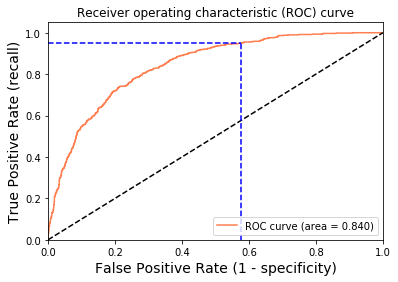

Using a threshold of 0.080 guarantees a sensitivity of 0.950 and a specificity of 0.422, i.e. a false positive rate of 57.77%.


In [43]:
% matplotlib inline
import matplotlib.pyplot as plt
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [44]:
idx

526